In [1]:
import numpy as np
from keras.datasets import reuters
from keras import models, layers
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/sendivogius/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sendivogius/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sendivogius/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sendivogius/miniconda3/lib/pytho

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
train_labels[10]

3

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train.shape

(8982, 10000)

In [10]:
x_train[0].sum() == len(set(train_data[0]))

True

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    
    model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [13]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, one_hot_train_labels, test_size=1000, random_state=42)

In [15]:
partial_x_train.shape, x_val.shape, partial_y_train.shape, y_val.shape

((7982, 10000), (1000, 10000), (7982, 46), (1000, 46))

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 169us/step - loss: 2.5307 - acc: 0.5106 - val_loss: 1.7155 - val_acc: 0.6330
Epoch 2/20
7982/7982 [==============================] - 1s 87us/step - loss: 1.4376 - acc: 0.6917 - val_loss: 1.3524 - val_acc: 0.7020
Epoch 3/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.0909 - acc: 0.7643 - val_loss: 1.1936 - val_acc: 0.7370
Epoch 4/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.8713 - acc: 0.8125 - val_loss: 1.0642 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.6976 - acc: 0.8532 - val_loss: 1.0100 - val_acc: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.5595 - acc: 0.8800 - val_loss: 0.9396 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.4494 - acc: 0.

In [17]:
history_dict = history.history
history_dict.keys()

val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [18]:
def plot_by_epoch(train, val, ylab, ax):
    epochs = range(1, len(history_dict['acc']) + 1)
    ax.plot(epochs, train, 'bo', label=f'Training {ylab}')
    ax.plot(epochs, val, 'b', label=f'Validation {ylab}')
    ax.set_title(f'Training and validation {ylab}')
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel(ylab)
    ax.legend()

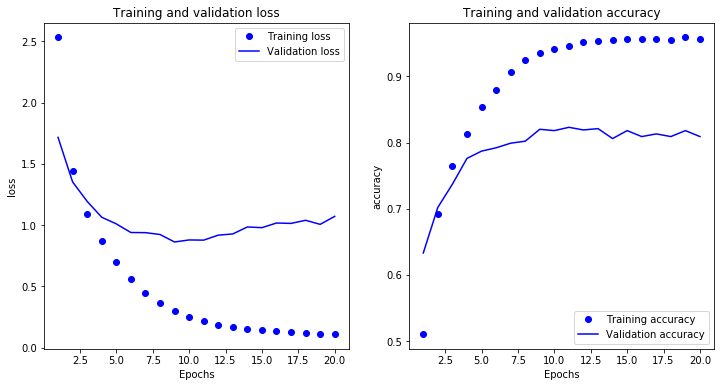

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
plot_by_epoch(loss_values, val_loss_values, 'loss', ax[0])
plot_by_epoch(acc_values, val_acc_values, 'accuracy', ax[1])

In [20]:
model = build_model()
model.fit(x_train, one_hot_train_labels, epochs=8, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
8982/8982 [==============================] - 1s 151us/step - loss: 2.4427 - acc: 0.5306
Epoch 2/8
8982/8982 [==============================] - 1s 83us/step - loss: 1.3253 - acc: 0.7154
Epoch 3/8
8982/8982 [==============================] - 1s 85us/step - loss: 0.9785 - acc: 0.7856
Epoch 4/8
8982/8982 [==============================] - 1s 85us/step - loss: 0.7601 - acc: 0.8379
Epoch 5/8
8982/8982 [==============================] - 1s 84us/step - loss: 0.5977 - acc: 0.8762
Epoch 6/8
8982/8982 [==============================] - 1s 108us/step - loss: 0.4761 - acc: 0.9011
Epoch 7/8
8982/8982 [==============================] - 1s 85us/step - loss: 0.3846 - acc: 0.9173
Epoch 8/8
2246/2246 [==============================] - 0s 173us/step


In [21]:
results

[0.9634198475818175, 0.7956366874443455]